## Deviation from normality.
Basically it is saying that most of the time the actual time series on different assest classes are actually <br>
not normally ditributed, hence normal assumption is just a **simplifying** assumption.
<br>
<br>

### Problem with the Assumption:

The real world is more complex. Actual investment returns, especially in stocks or hedge funds, don't always<br> behave like the simple bell curve suggests.

#### Key Points:

1. Extreme Returns in Normal Distribution:

    - In a perfect world (normal distribution assumption), extreme positive or negative returns are very rare.<br> It's like saying, "I expect to never see really big gains or losses."


2. Reality Check - Actual Returns:
    - When we look at actual investment returns, they can be way bigger (both good and bad) than what<br> the simple assumption predicts.
<br>

3. Underestimating Extreme Events:
    - The assumption of a normal distribution underestimates the chances and sizes of really big positive or negative returns.
<br>

4. Introducing Skewness and Kurtosis:
    - To better understand real-world returns, we introduce two concepts:
        - **Skewness**: Measures how lopsided the distribution is.
        - **Kurtosis**: Measures how thick or thin the tails of the distribution are.
<br>

5. Negatively Skewed Distributions:
    - If returns are negatively skewed, it means there's a higher chance of really bad outcomes.
    - When the mean (average) is less than the median, it signals negative skewness.
<br>

6. Volatility and Risk:
    - Volatility is a common measure of risk.
    - In negatively skewed distributions, relying only on volatility might make the risk seem less than<br> it actually is, especially for extreme negative returns.
<br>

7. Reality Check - Hedge Fund Returns:
    - Looking at actual hedge fund returns, we often see negative skewness and high kurtosis,<br> indicating a higher chance of extreme negative returns.
<br>

8. Statistical Test - Jarque-Bera Test:
    - The Jarque-Bera test helps us statistically check if a distribution is significantly<br>
     different from the normal distribution.
<br>

9. Conclusion:
    - Most investment returns don't fit the simple normal distribution assumption.
    - Assuming normal distribution can be a big oversimplification, especially because extreme events<br>
     happen more often than predicted.


## Kurtosis:

- Kurtosis is like looking at the tails of a distribution
- If the distribution has fat tails, it means extreme events are more common.
- If the tails are skinny, it means most values are close to the average, and extreme values are rare.
- Understanding kurtosis helps us grasp how likely we are to see really high or really low values in a dataset.


In [72]:
# Deviation from Normality
%load_ext autoreload
%autoreload 2

import pandas as pd
import edhec_risk as erk

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [24]:
hfi = erk.get_hfi_returns()
hfi.head()

e:\AnchorBlock_works\edhec_risk.py:41: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  hfi = pd.read_csv('data/edhec-hedgefundindices.csv',


,Convertible Arbitrage,CTA Global,Distressed Securities,Emerging Markets,Equity Market Neutral,Event Driven,Fixed Income Arbitrage,Global Macro,Long/Short Equity,Merger Arbitrage,Relative Value,Short Selling,Funds Of Funds
date,,,,,,,,,,,,,
1997-01,0.0119,0.0393,0.0178,0.0791,0.0189,0.0213,0.0191,0.0573,0.0281,0.0150,0.0180,-0.0166,0.0317
1997-02,0.0123,0.0298,0.0122,0.0525,0.0101,0.0084,0.0122,0.0175,-0.0006,0.0034,0.0118,0.0426,0.0106
1997-03,0.0078,-0.0021,-0.0012,-0.0120,0.0016,-0.0023,0.0109,-0.0119,-0.0084,0.0060,0.0010,0.0778,-0.0077
1997-04,0.0086,-0.0170,0.0030,0.0119,0.0119,-0.0005,0.0130,0.0172,0.0084,-0.0001,0.0122,-0.0129,0.0009
1997-05,0.0156,-0.0015,0.0233,0.0315,0.0189,0.0346,0.0118,0.0108,0.0394,0.0197,0.0173,-0.0737,0.0275


## Measure the skewness and kurtosis

### Skewness

$$ S(R) = \frac{E[(R-E(R))^3]}{\sigma_R^3}$$
Here, S = Skewness <br>
R = Returns <br>
E(R) = Mean of Returns <br>
sigma = volatility / standard deviation<br>

-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
### Kurtosis:
$$ K(R) = \frac{E[(R-E(R))^4]}{\sigma_R^4}$$

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

***The **Jarque-Bera** test is a statistical test used to assess whether a given set of data follows a normal distribution***

In [32]:
skew_table = pd.concat([hfi.mean(), hfi.median(), hfi.mean() > hfi.median()],  axis = 'columns')
skew_table.columns = ['Mean', 'Median', 'Not Skewed' ]
skew_table


,Mean,Median,Not Skewed
Convertible Arbitrage,0.005508,0.0065,False
CTA Global,0.004074,0.0014,True
Distressed Securities,0.006946,0.0089,False
Emerging Markets,0.006253,0.0096,False
Equity Market Neutral,0.004498,0.0051,False
Event Driven,0.006344,0.0084,False
Fixed Income Arbitrage,0.004365,0.0055,False
Global Macro,0.005403,0.0038,True
Long/Short Equity,0.006331,0.0079,False
Merger Arbitrage,0.005356,0.0060,False


In [35]:
erk.skewness(hfi).sort_values()

Fixed Income Arbitrage   -3.940320
Convertible Arbitrage    -2.639592
Equity Market Neutral    -2.124435
Relative Value           -1.815470
Event Driven             -1.409154
Merger Arbitrage         -1.320083
Distressed Securities    -1.300842
Emerging Markets         -1.167067
Long/Short Equity        -0.390227
Funds Of Funds           -0.361783
CTA Global                0.173699
Short Selling             0.767975
Global Macro              0.982922
dtype: float64

In [41]:
# Using in-built function for measuring skewness
import scipy.stats
scipy.stats.skew(hfi)

array([-2.63959223,  0.17369864, -1.30084204, -1.16706749, -2.12443538,
       -1.40915356, -3.94032029,  0.98292188, -0.39022677, -1.32008333,
       -1.81546975,  0.76797484, -0.36178308])

In [46]:
# Measuring Kurtosis
erk.kurtosis(hfi).sort_values()

CTA Global                 2.952960
Long/Short Equity          4.523893
Global Macro               5.741679
Short Selling              6.117772
Funds Of Funds             7.070153
Distressed Securities      7.889983
Event Driven               8.035828
Merger Arbitrage           8.738950
Emerging Markets           9.250788
Relative Value            12.121208
Equity Market Neutral     17.218555
Convertible Arbitrage     23.280834
Fixed Income Arbitrage    29.842199
dtype: float64

In [44]:
# Using in-built function for measuring kurtosis
scipy.stats.kurtosis(hfi)
# There is a difference between the kurtosis function I created and in-built function is that 
# in the in-built function it shows "excess" kurtosis which means it substracts 3 from the kurtosis.

array([20.28083446, -0.04703963,  4.88998336,  6.25078841, 14.21855526,
        5.03582817, 26.84219928,  2.74167945,  1.52389258,  5.73894979,
        9.12120787,  3.11777175,  4.07015278])

In [47]:
# Seeing if the data is normally distributed or not using Jarque-bera

# WRONG WAY OF DOING THIS
scipy.stats.jarque_bera(hfi) # This line of code is wrong as it combines all the data of different company and gave a result

SignificanceResult(statistic=25656.585999171337, pvalue=0.0)

In [49]:
#RIGHT WAY:
hfi.aggregate(erk.is_normal_distributed)

Convertible Arbitrage     False
CTA Global                 True
Distressed Securities     False
Emerging Markets          False
Equity Market Neutral     False
Event Driven              False
Fixed Income Arbitrage    False
Global Macro              False
Long/Short Equity         False
Merger Arbitrage          False
Relative Value            False
Short Selling             False
Funds Of Funds            False
dtype: bool

In [50]:
# Checking Skewness, Kurtosis and JB for Portoflio Formed dataset
ffme = erk.get_ffme_returns()
erk.skewness(ffme)

SmallCap    4.410739
LargeCap    0.233445
dtype: float64

In [51]:
erk.kurtosis(ffme)

SmallCap    46.845008
LargeCap    10.694654
dtype: float64

In [52]:
ffme.aggregate(erk.is_normal_distributed)

SmallCap    False
LargeCap    False
dtype: bool

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## Downside Risk Measures

1. **Semi-Deviation** is the *volatility* of the *sub-sample* of **below average** or **below zero** returns

    - Recognizes that investors are more concerned about uncertainty or volatility on the downside.
    - It is a measure of volatility that considers only the outcomes below the mean or zero.
    - Focuses on losses rather than gains.

$$ σ_{semi} = \sqrt{\frac{1}{N} Σ_{R_{i} \leq \overline{R}} \ (R_{i}- R)^2 }$$
N = Number of returns that fall bellow the mean 

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

2. **Value at Risk(VaR):**
    - Aims to estimate the maximum loss that can occur to a portfolio with a given probability.
    - Defined at a specified confidence level, such as 99%, indicating the worst possible outcome after excluding<br> a certain percentage of extreme losses (e.g., 1%).
    - VaR is expressed as a positive number and represents the magnitude of the maximum loss.

*Question:* Consider the following sequence of monthly returns on a portfolio:  -4%, +5%, +2%, -7%, +1%, +0.5%,<br> -2%, -1%, -2%, +5%.What is the 90% monthly VaR for the portfolio? <br><br>
*Answer:* Out of 10 monthly returns, the worst outcome is -7%, so 1 out of 10 returns is equal to -7%, and 9 out <br> of ten are better than -7%. The worst return after excluding the 10% worst return, that is after excluding the worst return, is<br> therefore -4%. VaR is typically expressed as a positive number (-4% means 4% loss): so 4% is the worst loss after excluding the 10% worst losses.

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

3. **Beyond Value at Risk or Conditional Value at Risk (CVaR):**
    - Recognizes that what happens beyond VaR may be of greater concern to investors.
    - CVaR is the expected loss beyond the VaR threshold.
    - It provides insight into the average loss in the tail of the distribution beyond the VaR.
    - Expressed as a positive number, representing the magnitude of the expected loss.


*Question:* Consider the following sequence of monthly returns on a portfolio:  -4%, +5%, +2%, -7%, +1%, +0.5%,<br> -2%, -1%, -2%, +5%. What is the 80% monthly CVaR for the portfolio? <br><br>
*Answer:* Out of 10 monthly returns, the worst outcome is -7% and the second worst outcome is -4%, so<br> 8 out of 10 outcomes are better than -4%. The worst return after excluding the 20% worst return, that is after excluding the two<br> worst return, is therefore -2%. VaR is typically expressed as a positive number so 2% is the 80% VaR. The CVaR is given by the average<br> loss beyond the VaR, that is -(-7%-4%)/2=5.5%.

<br><br>

**VaR and CVaR provide meaningful indicators to estimate the maximum loss and expected loss beyond a certain confidence level.**

In [55]:
# Downside Measures
hfi[hfi<0].std(ddof=0)

erk.semi_deviation(hfi)

Convertible Arbitrage     0.019800
CTA Global                0.022163
Distressed Securities     0.020214
Emerging Markets          0.037962
Equity Market Neutral     0.009568
Event Driven              0.019756
Fixed Income Arbitrage    0.015972
Global Macro              0.012588
Long/Short Equity         0.021899
Merger Arbitrage          0.011257
Relative Value            0.013649
Short Selling             0.042020
Funds Of Funds            0.016471
dtype: float64

## Methodologies used to extimate Value at Risk (VaR):

1. **Historical Volatility:**

   - **Pros:** No assumptions about return distributions, no model risk.
   - **Cons:** Highly sensitive to the sample period, subject to sample risk.

2. **Parametric Gaussian Estimate:**

   - **Pros:** Simple, only requires estimating mean and volatility.
   - **Cons:** Assumes a Gaussian distribution, underestimates extreme risks due to thin tails.

3. **Parametric Non-Gaussian:**

   - **Pros:** Allows for various non-Gaussian distributions.
   - **Cons:** Specification risk, as the chosen distribution may not match the actual data.
4. **Cornish-Fisher VaR:**

   - **Pros:** Semi-parametric, doesn't assume a specific return distribution, adjusts for skewness and kurtosis.
   - **Cons:** Not as simple as Gaussian estimate, but provides more realistic estimates.

### Historical VaR

In [65]:
import numpy as np
erk.var_historic(hfi)
# There is a 5% chance (or 1 in 20 chance) that you could experience 
# a loss equal to or greater than 0.01576 in any given month, and you 
# can be 95% confident that the actual loss will be less than this amount.

Convertible Arbitrage     0.01576
CTA Global                0.03169
Distressed Securities     0.01966
Emerging Markets          0.04247
Equity Market Neutral     0.00814
Event Driven              0.02535
Fixed Income Arbitrage    0.00787
Global Macro              0.01499
Long/Short Equity         0.02598
Merger Arbitrage          0.01047
Relative Value            0.01174
Short Selling             0.06783
Funds Of Funds            0.02047
dtype: float64

### VaR with Gaussian

In [67]:
from scipy.stats import norm

z = norm.ppf(0.05) # Returns the z-score

In [68]:
z

-1.6448536269514729

In [71]:
-(hfi.mean() + z*hfi.std(ddof=0))

Convertible Arbitrage     0.021691
CTA Global                0.034235
Distressed Securities     0.021032
Emerging Markets          0.047164
Equity Market Neutral     0.008850
Event Driven              0.021144
Fixed Income Arbitrage    0.014579
Global Macro              0.018766
Long/Short Equity         0.026397
Merger Arbitrage          0.010435
Relative Value            0.013061
Short Selling             0.080086
Funds Of Funds            0.021292
dtype: float64

In [75]:
erk.var_gaussian(hfi)

Convertible Arbitrage     0.021691
CTA Global                0.034235
Distressed Securities     0.021032
Emerging Markets          0.047164
Equity Market Neutral     0.008850
Event Driven              0.021144
Fixed Income Arbitrage    0.014579
Global Macro              0.018766
Long/Short Equity         0.026397
Merger Arbitrage          0.010435
Relative Value            0.013061
Short Selling             0.080086
Funds Of Funds            0.021292
dtype: float64

### VaR with Cornish-Fisher

In [76]:
# Cornish-Fisher is a modified version of gaussian function

erk.var_gaussian(hfi,modified=True)

Convertible Arbitrage     0.025166
CTA Global                0.033094
Distressed Securities     0.025102
Emerging Markets          0.053011
Equity Market Neutral     0.010734
Event Driven              0.025516
Fixed Income Arbitrage    0.017881
Global Macro              0.013581
Long/Short Equity         0.027935
Merger Arbitrage          0.012612
Relative Value            0.016157
Short Selling             0.066157
Funds Of Funds            0.021576
dtype: float64

<Axes: title={'center': 'Edhec Hedge Fund Indices: VaR'}>

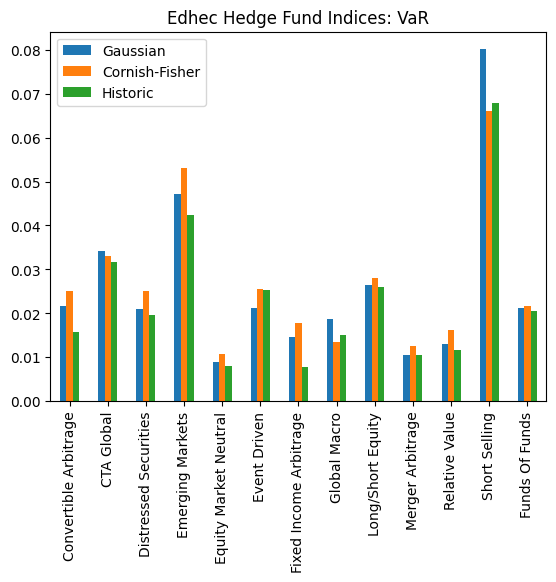

In [84]:
var_list = [erk.var_gaussian(hfi), erk.var_gaussian(hfi, modified=True), erk.var_historic(hfi)]
var_list = pd.concat(var_list, axis=1)
var_list.columns = ["Gaussian", "Cornish-Fisher", "Historic"]
var_list.plot.bar(title="Edhec Hedge Fund Indices: VaR")

## CVar -> Conditional Var (Beyond VaR)

In [85]:
erk.cvar_historic(hfi)
# If the worst 5% of scenarios were to occur, i.e., if you experience losses beyond the 5% Value at Risk (VaR),
#  then on average, you might expect a monthly loss of approximately 3.65%

Convertible Arbitrage     0.036550
CTA Global                0.041264
Distressed Securities     0.036429
Emerging Markets          0.072364
Equity Market Neutral     0.016879
Event Driven              0.038336
Fixed Income Arbitrage    0.028257
Global Macro              0.020629
Long/Short Equity         0.041943
Merger Arbitrage          0.019143
Relative Value            0.024650
Short Selling             0.096821
Funds Of Funds            0.033207
dtype: float64